<a href="https://colab.research.google.com/github/Parthbisht16/GGSIPU-locational-analysis/blob/main/GGSIPU_locational_analysis_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Analysis of Geolocational Data

## Introduction :

This project involves the use of K-Means Clustering to find the best accommodation for
students in Delhi (or any other city of your choice) by classifying accommodation for
incoming students on the basis of their preferences on amenities, budget and proximity to
the location.

Let us first import all the packages we need for analysis.

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import geopandas as gpd
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas import json_normalize
from tabulate import tabulate
print("All packages imported!")

All packages imported!


Alright, now let us import the raw dataset for student preferences...

In [ ]:
dfstudents=pd.read_csv('food_coded.csv')

We shall only take the columns useful to us:

In [ ]:
dfclean=dfstudents[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
dfclean.dropna(axis=0,inplace=True)
dfclean.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\3365265966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean.dropna(axis=0,inplace=True)


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


## Identifying the different kinds of students

Let us visualise the distrubtion of data with a boxplot:

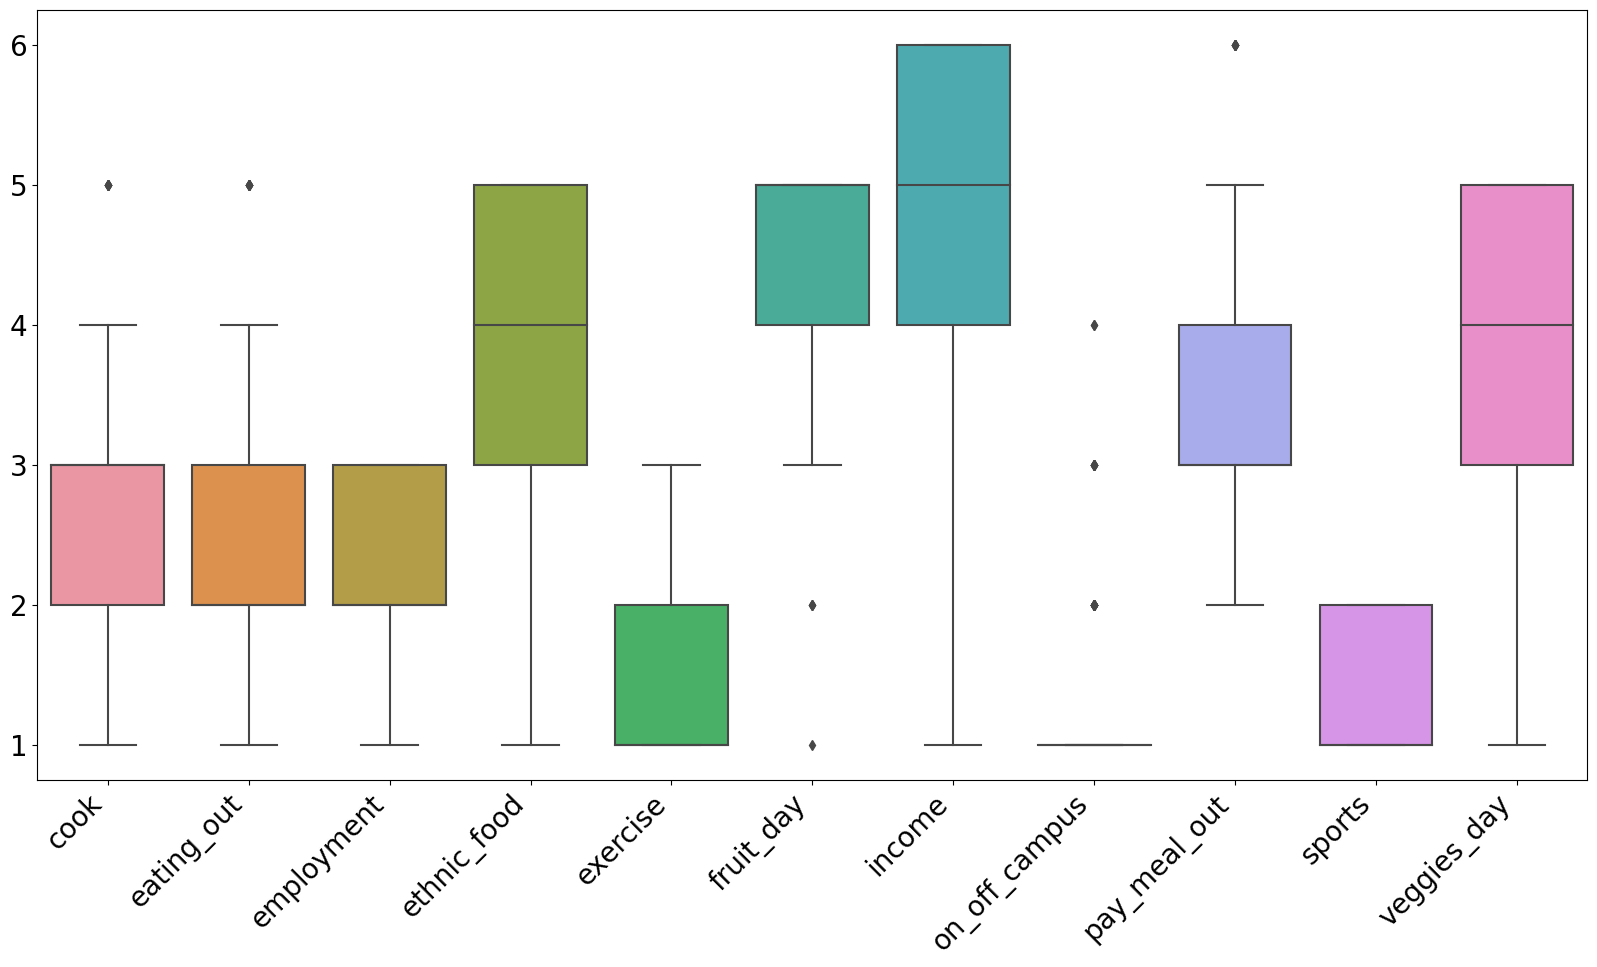

In [ ]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = dfclean)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfclean)
dfclean['Cluster']=kmeans.labels_

C:\Users\Acer\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\1730389316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['Cluster']=kmeans.labels_


C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\4201883230.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = dfclean[dfclean['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\4201883230.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = dfclean[dfclean['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\4201883230.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.boxplot(data = dfclean[dfclean['Cluster'] == k].drop('Cluster',1), ax=axes[k])


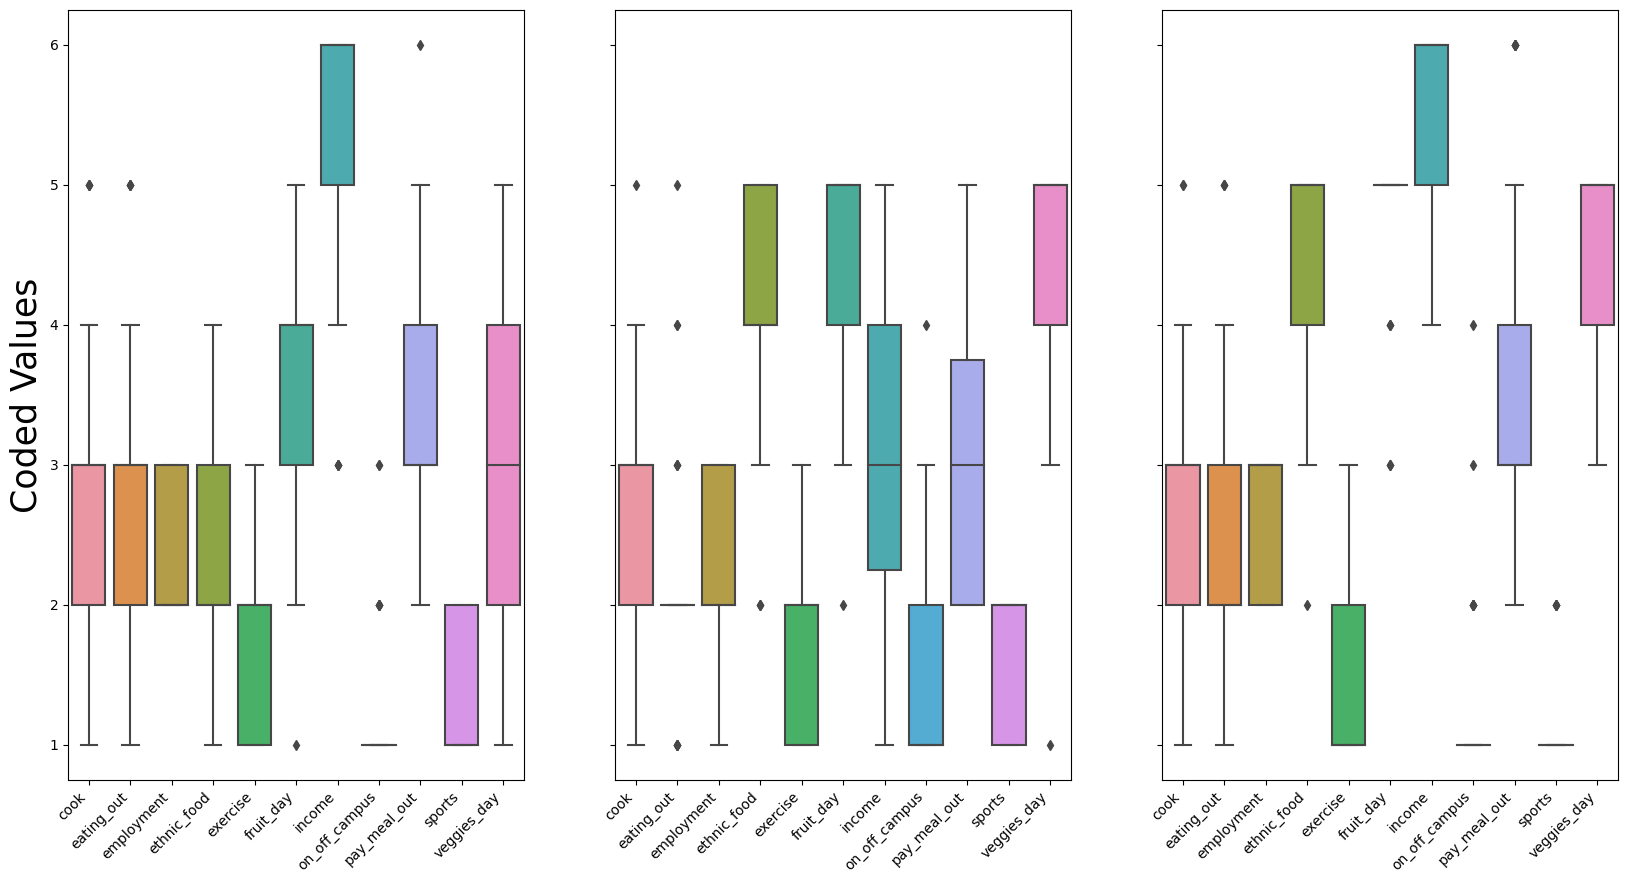

In [ ]:
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = dfclean[dfclean['Cluster'] == k].drop('Cluster',1), ax=axes[k])
        
plt.show()

**Possible insights:**

Kmeans:
2 clusters: No clear demarcation is seen; we can't discriminate on 2 categories alone.

3 clusters: Now we see three clear groups: One high income group which insists on eating healthy, the other is more relaxed in diet.

The low income group has its own profile, as discussed in insights.

For higher numbers of clusters, it becomes difficult to draw any concrete conclusions.
   


High income students in general are:

1.>Much more likely to stay on campus.

2.>Less likely to cook.

3.>Eat out more often.

In addition, a subset of higher income students:
1.>Eat out less often.

2.>Have a healthier, more varied diet in general. (Eat ethnic food, fruits, vegetables etc.)

Lower income students are more likely to:

1.>Eat more vegetables

2.>Eat more fruits.

3.>More likely to cook, so more likely to stay off campus.

4.>Obviously, pay less for meals out.


Essentially, we need to think about accomodation for 2 types of students, low income and high income(varied diet).

The high income(fixed diet) students will ideally stay on campus, so they don't have to be taken into account.

# Finding the students a apartment

My analysis will be on the city I currently reside in, i.e Delhi, India!

Specifically, I will begin by looking at the housing areas around GGSIPU.

We begin by defining the parameters of our foursquare seach query:

In [ ]:
search_query = 'Apartment' #Search for residential locations
radius = 20000 #Set the radius to 18 kilometres due to traffic constraints
latitude=28.594899#GGSIPU location
longitude=77.021327

Now to define our foursquare credentials:

In [ ]:
CLIENT_ID='YVXU3P2WSRWZAFQPVSSO3HHUVWZ5TIMEW1NNKENYURXHMMKD'
CLIENT_SECRET='Q3ABL5LX1B2AXBEOTM3AIL3NM2DYAJ2JEYJNFMPHYWZJRXHR'
VERSION = '20180604'
LIMIT = 200

In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [ ]:
results = requests.get(url).json()

In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
n = 200
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(n = n)

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.city,location.state,location.crossStreet,location.postalCode
0,4edb45ac0aaf49e02aa30cc3,Ispatika Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1662743357,False,"Sec 4, Dwarka",28.601269,77.048880,"[{'label': 'display', 'lat': 28.60126874658018...",2784,IN,India,"[Sec 4, Dwarka, India]",NaN,NaN,NaN,NaN
1,5184977d498ec7f6416fdcba,"Shivam,Apartment, Sec 12","[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1662743357,False,Dwarka,28.596122,77.045318,"[{'label': 'display', 'lat': 28.59612162667995...",2348,IN,India,"[Dwarka, New Delhi, Delhi, India]",New Delhi,Delhi,NaN,NaN
2,4efe8845b6346feaeba89dc0,"National Apartment Sector 3, Near sec3/13 traf...",[],v-1662743357,False,Sector 3 Dwarka,28.603650,77.040910,"[{'label': 'display', 'lat': 28.60365, 'lng': ...",2147,IN,India,"[Sector 3 Dwarka (Azad Hind Fauz Road), New De...",New Delhi,Delhi,Azad Hind Fauz Road,110078
3,4efe88f3775bec6b42df0632,national apartment sector 3 dwarka,[],v-1662743357,False,NaN,28.604821,77.042990,"[{'label': 'display', 'lat': 28.60482076779481...",2388,IN,India,[India],NaN,NaN,NaN,NaN
4,516a4e8ee4b01de80d736d8e,gokul apartment sector 11,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1662743357,False,NaN,28.593309,77.047081,"[{'label': 'display', 'lat': 28.59330940246582...",2523,IN,India,[India],NaN,NaN,NaN,NaN
5,5187df94498e3dfc9e0f525a,The Stoners apartment.,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1662743357,False,U Block,28.495667,77.095830,"[{'label': 'display', 'lat': 28.49566694001060...",13232,IN,India,"[U Block (21/20), Gurgaon 122001, Haryāna, India]",Gurgaon,Haryāna,21/20,122001
6,578ee93c498e2a11e7647c58,South Delhi Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1662743357,False,Plot No.8,28.603310,77.051254,"[{'label': 'display', 'lat': 28.60331, 'lng': ...",3071,IN,India,"[Plot No.8 (Sector 4), New Delhi 110075, Delhi...",New Delhi,Delhi,Sector 4,110075
7,5fcbc2c14a774867c404be66,Oyo 37722 Silver Oak Luxury Apartment,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1662743357,False,"Block b , Plot Num 226,",28.577158,77.047214,"[{'label': 'display', 'lat': 28.577158, 'lng':...",3209,IN,India,"[Block b , Plot Num 226, (Near Mother Dairy), ...",New Delhi,Delhi,Near Mother Dairy,110075
8,5117d231e4b05b41f518d44a,New Millenium Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1662743357,False,"Sector 23, Plot 2",28.560323,77.054060,"[{'label': 'display', 'lat': 28.56032324683900...",5005,IN,India,"[Sector 23, Plot 2 (Dwarka), New Delhi 110075,...",New Delhi,Delhi,Dwarka,110075
9,4ffb9c40e4b02d09f9b5ff9e,skylark apartment dwarka sector 06,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1662743357,False,NaN,28.588090,77.063409,"[{'label': 'display', 'lat': 28.58809001776062...",4182,IN,India,[India],NaN,NaN,NaN,NaN


In [ ]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.drop([5,33,35,49],axis=0,inplace=True) #remove some unwanted locations(too far away etc.)
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True) #no need for those columns as we know we're in Delhi,IN
dataframe_filtered.head(n = n)

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,crossStreet,postalCode,id
0,Ispatika Apartment,Residential Building (Apartment / Condo),"Sec 4, Dwarka",28.601269,77.048880,"[{'label': 'display', 'lat': 28.60126874658018...",2784,"[Sec 4, Dwarka, India]",NaN,NaN,4edb45ac0aaf49e02aa30cc3
1,"Shivam,Apartment, Sec 12",Residential Building (Apartment / Condo),Dwarka,28.596122,77.045318,"[{'label': 'display', 'lat': 28.59612162667995...",2348,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,5184977d498ec7f6416fdcba
2,"National Apartment Sector 3, Near sec3/13 traf...",None,Sector 3 Dwarka,28.603650,77.040910,"[{'label': 'display', 'lat': 28.60365, 'lng': ...",2147,"[Sector 3 Dwarka (Azad Hind Fauz Road), New De...",Azad Hind Fauz Road,110078,4efe8845b6346feaeba89dc0
3,national apartment sector 3 dwarka,None,NaN,28.604821,77.042990,"[{'label': 'display', 'lat': 28.60482076779481...",2388,[India],NaN,NaN,4efe88f3775bec6b42df0632
4,gokul apartment sector 11,Residential Building (Apartment / Condo),NaN,28.593309,77.047081,"[{'label': 'display', 'lat': 28.59330940246582...",2523,[India],NaN,NaN,516a4e8ee4b01de80d736d8e
6,South Delhi Apartment,Residential Building (Apartment / Condo),Plot No.8,28.603310,77.051254,"[{'label': 'display', 'lat': 28.60331, 'lng': ...",3071,"[Plot No.8 (Sector 4), New Delhi 110075, Delhi...",Sector 4,110075,578ee93c498e2a11e7647c58
7,Oyo 37722 Silver Oak Luxury Apartment,Hotel,"Block b , Plot Num 226,",28.577158,77.047214,"[{'label': 'display', 'lat': 28.577158, 'lng':...",3209,"[Block b , Plot Num 226, (Near Mother Dairy), ...",Near Mother Dairy,110075,5fcbc2c14a774867c404be66
8,New Millenium Apartments,Residential Building (Apartment / Condo),"Sector 23, Plot 2",28.560323,77.054060,"[{'label': 'display', 'lat': 28.56032324683900...",5005,"[Sector 23, Plot 2 (Dwarka), New Delhi 110075,...",Dwarka,110075,5117d231e4b05b41f518d44a
9,skylark apartment dwarka sector 06,Residential Building (Apartment / Condo),NaN,28.588090,77.063409,"[{'label': 'display', 'lat': 28.58809001776062...",4182,[India],NaN,NaN,4ffb9c40e4b02d09f9b5ff9e
10,Ramakrishan Cghs Apartment,Residential Building (Apartment / Condo),NaN,28.562868,77.051080,"[{'label': 'display', 'lat': 28.562868, 'lng':...",4601,"[New Delhi 110077, Delhi, India]",NaN,110077,59733a8ceacf453223eced6f


Let us plot all these potential locations on a map of Delhi:

In [ ]:
#define coordinates of the college
map_bang=folium.Map(location=[28.6096354,77.0926795],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

Now, let's figure out which locations are ideal for which kinds of student. 

We will keep in mind the fact that the lower income students need a steady supply of fresh fruits, while the high income students need plenty of restaurant options to choose from.

In [ ]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [ ]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 5000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())
    display(dataframe_filtered2)


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,crossStreet,postalCode,city,state,id
0,Ispatika Apartment,Residential Building (Apartment / Condo),"Sec 4, Dwarka",28.601269,77.048880,"[{'label': 'display', 'lat': 28.60126874658018...",0,IN,India,"[Sec 4, Dwarka, India]",NaN,NaN,NaN,NaN,4edb45ac0aaf49e02aa30cc3
1,South Delhi Apartment,Residential Building (Apartment / Condo),Plot No.8,28.603310,77.051254,"[{'label': 'display', 'lat': 28.60331, 'lng': ...",324,IN,India,"[Plot No.8 (Sector 4), New Delhi 110075, Delhi...",Sector 4,110075,New Delhi,Delhi,578ee93c498e2a11e7647c58
2,"Shivam,Apartment, Sec 12",Residential Building (Apartment / Condo),Dwarka,28.596122,77.045318,"[{'label': 'display', 'lat': 28.59612162667995...",670,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,New Delhi,Delhi,5184977d498ec7f6416fdcba
3,national apartment sector 3 dwarka,None,NaN,28.604821,77.042990,"[{'label': 'display', 'lat': 28.60482076779481...",698,IN,India,[India],NaN,NaN,NaN,NaN,4efe88f3775bec6b42df0632
4,"National Apartment Sector 3, Near sec3/13 traf...",None,Sector 3 Dwarka,28.603650,77.040910,"[{'label': 'display', 'lat': 28.60365, 'lng': ...",822,IN,India,"[Sector 3 Dwarka (Azad Hind Fauz Road), New De...",Azad Hind Fauz Road,110078,New Delhi,Delhi,4efe8845b6346feaeba89dc0
5,gokul apartment sector 11,Residential Building (Apartment / Condo),NaN,28.593309,77.047081,"[{'label': 'display', 'lat': 28.59330940246582...",903,IN,India,[India],NaN,NaN,NaN,NaN,516a4e8ee4b01de80d736d8e
6,skylark apartment dwarka sector 06,Residential Building (Apartment / Condo),NaN,28.588090,77.063409,"[{'label': 'display', 'lat': 28.58809001776062...",2041,IN,India,[India],NaN,NaN,NaN,NaN,4ffb9c40e4b02d09f9b5ff9e
7,Sukh Sagar Apartment,Residential Building (Apartment / Condo),"Plot No. - 12, Dwarka Sector - 9",28.583254,77.066298,"[{'label': 'display', 'lat': 28.583254, 'lng':...",2630,IN,India,"[Plot No. - 12, Dwarka Sector - 9, New Delhi 1...",NaN,110077,New Delhi,Delhi,5736bade498e8349f57ac805
8,Oyo 37722 Silver Oak Luxury Apartment,Hotel,"Block b , Plot Num 226,",28.577158,77.047214,"[{'label': 'display', 'lat': 28.577158, 'lng':...",2688,IN,India,"[Block b , Plot Num 226, (Near Mother Dairy), ...",Near Mother Dairy,110075,New Delhi,Delhi,5fcbc2c14a774867c404be66
9,"Air India Apartments,Sector 3,Plot 9,Dwarka",Residential Building (Apartment / Condo),NaN,28.603441,77.045290,"[{'label': 'display', 'lat': 28.60344142721175...",426,IN,India,[India],NaN,NaN,NaN,NaN,4f3523f8e4b0ba1c47e23658


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",407,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",4e3973a52271aebfead50ac6
1,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",768,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",4dc0303b0cb6f21c128287f6
2,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",677,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",4dff77cb1f6e4f313a7744cb
3,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1254,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",4fccff7de4b0c18edef7ded7
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1429,NaN,IN,NaN,NaN,India,[India],51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1575,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3130,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",4d16e3dc85fc6dcb507fa94e
7,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3591,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",4e3525bd6284ea7e10fd1e0b
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3748,NaN,IN,NaN,NaN,India,[India],52cbfd3e498e1721d7f0ce74
9,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",5086,NaN,IN,Delhi,Delhi,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",4f756543e4b0ae71ab96d67e


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",411,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1227,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1513,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1415,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2282,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2391,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2764,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3358,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4890,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e
9,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4533,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",602,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1209,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1451,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1356,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2236,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2526,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
6,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2327,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3122,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4648,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e
9,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4564,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",339,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",4e3973a52271aebfead50ac6
1,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",630,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",4dc0303b0cb6f21c128287f6
2,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",570,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",4dff77cb1f6e4f313a7744cb
3,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1136,NaN,IN,NaN,NaN,India,[India],51d5b6d9498ea9118c791864
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1303,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",4dae942b6e81e2dffdcab3dc
5,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1605,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",4fccff7de4b0c18edef7ded7
6,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3234,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3320,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3937,NaN,IN,NaN,NaN,India,[India],52cbfd3e498e1721d7f0ce74
9,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",5194,NaN,IN,Delhi,Delhi,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",4f756543e4b0ae71ab96d67e


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,postalCode,crossStreet,id
0,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",911,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,NaN,4dc0303b0cb6f21c128287f6
1,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",849,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,110075,NaN,4dff77cb1f6e4f313a7744cb
2,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",881,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
3,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1416,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,Dwarka,4fccff7de4b0c18edef7ded7
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1659,IN,NaN,NaN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1695,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,NaN,NaN,4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2145,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",2763,IN,NaN,NaN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4115,IN,Delhi,Delhi,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",Janakpuri Dist Centre,NaN,NaN,4f756543e4b0ae71ab96d67e
9,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4140,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,NaN,NaN,4e3525bd6284ea7e10fd1e0b


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,postalCode,crossStreet,id
0,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1735,IN,India,[India],NaN,NaN,NaN,NaN,NaN,51d5b6d9498ea9118c791864
1,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1800,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,New Delhi,Delhi,NaN,NaN,4e3525bd6284ea7e10fd1e0b
2,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",2099,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",2124,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,New Delhi,Delhi,110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",2059,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",New Delhi,Delhi,110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1902,IN,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,New Delhi,Delhi,NaN,NaN,4dae942b6e81e2dffdcab3dc
6,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3216,IN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,NaN,NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4991,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,New Delhi,Delhi,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",5593,IN,India,[India],NaN,NaN,NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",5695,IN,India,[India],NaN,NaN,NaN,NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,neighborhood,id
0,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1083,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,NaN,4e3525bd6284ea7e10fd1e0b
1,Restaurant (Pride Plaza),Restaurant,NaN,28.552671,77.123070,"[{'label': 'display', 'lat': 28.552671, 'lng':...",6801,IN,New Delhi,Delhi,India,"[New Delhi 110037, Delhi, India]",110037,NaN,NaN,5aae25b4d033606260b3caea
2,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",3280,IN,NaN,NaN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
3,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",3893,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,NaN,4dc0303b0cb6f21c128287f6
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",3364,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,NaN,4dae942b6e81e2dffdcab3dc
5,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",3944,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,NaN,4dff77cb1f6e4f313a7744cb
6,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",3947,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,NaN,4e3973a52271aebfead50ac6
7,laziz restaurant,Cuban Restaurant,NaN,28.524334,77.042985,"[{'label': 'display', 'lat': 28.52433377765034...",4150,IN,NaN,NaN,India,[India],NaN,NaN,NaN,50573f3be4b0540a8153f4de
8,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",5206,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,NaN,4fccff7de4b0c18edef7ded7
9,citrus Restaurant,Restaurant,NaN,28.551847,77.120721,"[{'label': 'display', 'lat': 28.55184716613404...",6585,IN,NaN,NaN,India,[India],NaN,NaN,NaN,52e0878611d25e253cd535aa


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",409,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",562,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1285,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1384,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1598,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2320,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
6,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3180,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3557,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
8,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3708,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145
9,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4090,IN,NaN,NaN,India,[India],NaN,NaN,52cbfd3e498e1721d7f0ce74


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1157,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",3049,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",3614,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",3153,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
4,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",3659,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
5,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",3641,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
6,laziz restaurant,Cuban Restaurant,NaN,28.524334,77.042985,"[{'label': 'display', 'lat': 28.52433377765034...",4362,IN,NaN,NaN,India,[India],NaN,NaN,50573f3be4b0540a8153f4de
7,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",4847,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
8,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",6431,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",800,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",3048,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",3687,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",3124,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
4,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",3743,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
5,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",3760,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
6,laziz restaurant,Cuban Restaurant,NaN,28.524334,77.042985,"[{'label': 'display', 'lat': 28.52433377765034...",4408,IN,NaN,NaN,India,[India],NaN,NaN,50573f3be4b0540a8153f4de
7,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",5067,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
8,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",6167,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,postalCode,crossStreet,id
0,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1081,IN,India,[India],NaN,NaN,NaN,NaN,NaN,51d5b6d9498ea9118c791864
1,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",986,IN,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,New Delhi,Delhi,NaN,NaN,4dae942b6e81e2dffdcab3dc
2,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1858,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,NaN,NaN,4dc0303b0cb6f21c128287f6
3,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1830,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,New Delhi,Delhi,NaN,NaN,4e3525bd6284ea7e10fd1e0b
4,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1953,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,New Delhi,Delhi,110075,NaN,4dff77cb1f6e4f313a7744cb
5,Restaurant (Pride Plaza),Restaurant,28.552671,77.123070,"[{'label': 'display', 'lat': 28.552671, 'lng':...",6511,IN,India,"[New Delhi 110037, Delhi, India]",NaN,New Delhi,Delhi,110037,NaN,5aae25b4d033606260b3caea
6,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",2142,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",New Delhi,Delhi,110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
7,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3732,IN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,NaN,NaN,Dwarka,4fccff7de4b0c18edef7ded7
8,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3787,IN,India,[India],NaN,NaN,NaN,NaN,NaN,55d8a133498e3fdd2295d145
9,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4113,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,New Delhi,Delhi,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e


,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Restaurant (Pride Plaza),Restaurant,28.552671,77.123070,"[{'label': 'display', 'lat': 28.552671, 'lng':...",5547,110037,IN,New Delhi,Delhi,India,"[New Delhi 110037, Delhi, India]",NaN,NaN,5aae25b4d033606260b3caea
1,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1934,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,NaN,4e3525bd6284ea7e10fd1e0b
2,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2033,NaN,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
3,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1905,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,NaN,4dae942b6e81e2dffdcab3dc
4,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",2783,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
5,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",2881,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,NaN,4dff77cb1f6e4f313a7744cb
6,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",3090,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",Dwarka Sector 12,4e3973a52271aebfead50ac6
7,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3450,NaN,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145
8,citrus Restaurant,Restaurant,28.551847,77.120721,"[{'label': 'display', 'lat': 28.55184716613404...",5408,NaN,IN,NaN,NaN,India,[India],NaN,NaN,52e0878611d25e253cd535aa
9,kandili restaurant janak puri,Indian Restaurant,28.616205,77.092728,"[{'label': 'display', 'lat': 28.6162052154541,...",4385,NaN,IN,NaN,NaN,India,[India],NaN,NaN,51d93528498e95963a573708


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",617,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1992,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",2335,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",2237,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",3031,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",3176,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3610,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4170,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4984,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",6383,IN,India,[India],NaN,NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1403,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1351,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1692,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1619,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2137,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2325,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
6,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3716,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4023,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4635,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Piccadily New Delhi/Janakpuri,Hotel,Janakpuri District Centre Complex,Janak Puri,28.629137,77.078726,"[{'label': 'display', 'lat': 28.62913673773412...",5861,IN,India,[Janakpuri District Centre Complex (Janak Puri...,110058,New Delhi,Delhi,4bf2653b7f2aef3b2ec0392a


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1656,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",4e3973a52271aebfead50ac6
1,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1967,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",4dc0303b0cb6f21c128287f6
2,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1824,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",4fccff7de4b0c18edef7ded7
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1908,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2280,NaN,IN,NaN,NaN,India,[India],51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2478,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",4dae942b6e81e2dffdcab3dc
6,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3538,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4440,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",5055,NaN,IN,NaN,NaN,India,[India],52cbfd3e498e1721d7f0ce74
9,Piccadily New Delhi/Janakpuri,Hotel,Janakpuri District Centre Complex,Janak Puri,28.629137,77.078726,"[{'label': 'display', 'lat': 28.62913673773412...",6263,110058,IN,New Delhi,Delhi,India,[Janakpuri District Centre Complex (Janak Puri...,4bf2653b7f2aef3b2ec0392a


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1280,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",4e3973a52271aebfead50ac6
1,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1391,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",4fccff7de4b0c18edef7ded7
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1620,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1548,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2068,NaN,IN,NaN,NaN,India,[India],51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2255,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",4dae942b6e81e2dffdcab3dc
6,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3677,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3969,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4583,NaN,IN,NaN,NaN,India,[India],52cbfd3e498e1721d7f0ce74
9,Piccadily New Delhi/Janakpuri,Hotel,Janakpuri District Centre Complex,Janak Puri,28.629137,77.078726,"[{'label': 'display', 'lat': 28.62913673773412...",5803,110058,IN,New Delhi,Delhi,India,[Janakpuri District Centre Complex (Janak Puri...,4bf2653b7f2aef3b2ec0392a


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",442,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1390,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1646,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1550,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2428,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2598,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
6,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2524,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3183,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4744,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e
9,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4729,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b


,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,neighborhood,id
0,Restaurant (Pride Plaza),Restaurant,28.552671,77.123070,"[{'label': 'display', 'lat': 28.552671, 'lng':...",4845,110037,IN,New Delhi,Delhi,India,"[New Delhi 110037, Delhi, India]",NaN,NaN,NaN,5aae25b4d033606260b3caea
1,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2859,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,NaN,NaN,4e3525bd6284ea7e10fd1e0b
2,citrus Restaurant,Restaurant,28.551847,77.120721,"[{'label': 'display', 'lat': 28.55184716613404...",4602,NaN,IN,NaN,NaN,India,[India],NaN,NaN,NaN,52e0878611d25e253cd535aa
3,Fire Palace Restaurant,Indian Restaurant,28.511847,77.073212,"[{'label': 'display', 'lat': 28.51184749956966...",3596,NaN,IN,Gurgaon,Haryāna,India,"[sector 21, Gurgaon, Haryāna, India]",sector 21,NaN,NaN,4d2571dcbe99b60c63a1f76e
4,Lazeez Restaurant,Indian Restaurant,28.506165,77.083852,"[{'label': 'display', 'lat': 28.50616487725328...",4325,NaN,IN,NaN,NaN,India,[India],NaN,NaN,NaN,5316e045498e25adae2d9437
5,laziz restaurant,Cuban Restaurant,28.524334,77.042985,"[{'label': 'display', 'lat': 28.52433377765034...",3787,NaN,IN,NaN,NaN,India,[India],NaN,NaN,NaN,50573f3be4b0540a8153f4de
6,Aanandam Multi Cuisine Restaurant,Diner,28.505104,77.085876,"[{'label': 'display', 'lat': 28.50510406494140...",4485,NaN,IN,Gurgaon,Haryāna,India,"[Convenience Shopping Complex, Opposite Plot 2...","Convenience Shopping Complex, Opposite Plot 26...",NaN,NaN,53f484f6498e9ed79422ddb6
7,Kaveri Restaurant,Asian Restaurant,28.504201,77.096547,"[{'label': 'display', 'lat': 28.5042013698309,...",4941,NaN,IN,NaN,NaN,India,[India],NaN,NaN,NaN,506c48f0e4b07457976d2f44
8,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",5312,NaN,IN,NaN,NaN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
9,Curry capital restaurant,Indian Restaurant,28.547808,77.126236,"[{'label': 'display', 'lat': 28.54780769348144...",5077,NaN,IN,NaN,NaN,India,[India],NaN,NaN,NaN,501d19e6e4b00422cabaed3c


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",142,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",4e3973a52271aebfead50ac6
1,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",377,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",4dff77cb1f6e4f313a7744cb
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",447,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",4dc0303b0cb6f21c128287f6
3,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1058,NaN,IN,NaN,NaN,India,[India],51d5b6d9498ea9118c791864
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1205,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",4dae942b6e81e2dffdcab3dc
5,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1609,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",4fccff7de4b0c18edef7ded7
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3136,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",4d16e3dc85fc6dcb507fa94e
7,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3290,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",4e3525bd6284ea7e10fd1e0b
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3751,NaN,IN,NaN,NaN,India,[India],52cbfd3e498e1721d7f0ce74
9,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4995,NaN,IN,Delhi,Delhi,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",4f756543e4b0ae71ab96d67e


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1181,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",4e3973a52271aebfead50ac6
1,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1493,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",4dc0303b0cb6f21c128287f6
2,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1433,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",4dff77cb1f6e4f313a7744cb
3,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1599,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",4fccff7de4b0c18edef7ded7
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1858,NaN,IN,NaN,NaN,India,[India],51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2051,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",4dae942b6e81e2dffdcab3dc
6,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3402,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4012,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4629,NaN,IN,NaN,NaN,India,[India],52cbfd3e498e1721d7f0ce74
9,Piccadily New Delhi/Janakpuri,Hotel,Janakpuri District Centre Complex,Janak Puri,28.629137,77.078726,"[{'label': 'display', 'lat': 28.62913673773412...",5813,110058,IN,New Delhi,Delhi,India,[Janakpuri District Centre Complex (Janak Puri...,4bf2653b7f2aef3b2ec0392a


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",368,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1376,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1647,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1550,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2424,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2686,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
6,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2526,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3271,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4829,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e
9,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4698,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,city,state,postalCode,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1574,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",3462,IN,India,"[New Delhi, Delhi, India]",New Delhi,Delhi,NaN,4dc0303b0cb6f21c128287f6
2,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",3137,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",New Delhi,Delhi,110078,4e3973a52271aebfead50ac6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",3363,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",New Delhi,Delhi,110075,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",4193,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4052,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",New Delhi,Delhi,NaN,4d16e3dc85fc6dcb507fa94e
6,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4518,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
7,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",4326,IN,India,"[Dwarka, New Delhi, Delhi, India]",New Delhi,Delhi,NaN,4dae942b6e81e2dffdcab3dc
8,Piccadily New Delhi/Janakpuri,Hotel,Janakpuri District Centre Complex,Janak Puri,28.629137,77.078726,"[{'label': 'display', 'lat': 28.62913673773412...",5905,IN,India,[Janakpuri District Centre Complex (Janak Puri...,New Delhi,Delhi,110058,4bf2653b7f2aef3b2ec0392a


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",733,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",911,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1184,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1086,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1958,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2063,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2691,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3300,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4252,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b
9,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4767,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",836,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",967,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1187,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1094,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1974,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2060,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2476,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3086,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4555,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e
9,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4336,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",897,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",4e3973a52271aebfead50ac6
1,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1193,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",4dc0303b0cb6f21c128287f6
2,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1138,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",4dff77cb1f6e4f313a7744cb
3,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1554,NaN,IN,NaN,NaN,India,[India],51d5b6d9498ea9118c791864
4,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1622,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",4fccff7de4b0c18edef7ded7
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1746,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",4dae942b6e81e2dffdcab3dc
6,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3246,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3806,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4425,NaN,IN,NaN,NaN,India,[India],52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",5514,NaN,IN,NaN,NaN,India,[India],55d8a133498e3fdd2295d145


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",383,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1227,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1522,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1423,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2285,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2399,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2825,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3420,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4515,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b
9,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4950,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,city,state,address,crossStreet,postalCode,id
0,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",913,IN,India,[India],NaN,NaN,NaN,NaN,NaN,51d5b6d9498ea9118c791864
1,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1034,IN,India,"[New Delhi, Delhi, India]",New Delhi,Delhi,NaN,NaN,NaN,4dc0303b0cb6f21c128287f6
2,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",989,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",New Delhi,Delhi,"G2, Plot No 10,Sector 12",Dwarka Sector 12,110078,4e3973a52271aebfead50ac6
3,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1052,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",New Delhi,Delhi,Sector 5 Market,NaN,110075,4dff77cb1f6e4f313a7744cb
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1116,IN,India,"[Dwarka, New Delhi, Delhi, India]",New Delhi,Delhi,Dwarka,NaN,NaN,4dae942b6e81e2dffdcab3dc
5,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2331,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,Sec-5,Dwarka,NaN,4fccff7de4b0c18edef7ded7
6,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2484,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",New Delhi,Delhi,Dwarka Sec. 20,NaN,NaN,4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3925,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",New Delhi,Delhi,G Block,Milap Nagar,NaN,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4532,IN,India,[India],NaN,NaN,NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",5019,IN,India,[India],NaN,NaN,NaN,NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,postalCode,id
0,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1236,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,NaN,4dc0303b0cb6f21c128287f6
1,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1058,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",Dwarka Sector 12,110078,4e3973a52271aebfead50ac6
2,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1218,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,NaN,110075,4dff77cb1f6e4f313a7744cb
3,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1322,IN,NaN,NaN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1525,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,NaN,NaN,4dae942b6e81e2dffdcab3dc
5,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2103,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",Sec-5,Dwarka,NaN,4fccff7de4b0c18edef7ded7
6,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2757,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,NaN,NaN,4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4054,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,Milap Nagar,NaN,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4669,IN,NaN,NaN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",5407,IN,NaN,NaN,India,[India],NaN,NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,city,state,postalCode,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1635,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",3321,IN,India,"[New Delhi, Delhi, India]",New Delhi,Delhi,NaN,4dc0303b0cb6f21c128287f6
2,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2957,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",New Delhi,Delhi,NaN,4d16e3dc85fc6dcb507fa94e
3,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",3085,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",New Delhi,Delhi,110078,4e3973a52271aebfead50ac6
4,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",3229,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",New Delhi,Delhi,110075,4dff77cb1f6e4f313a7744cb
5,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3342,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
6,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",4109,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
7,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",5046,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",Delhi,Delhi,NaN,4f756543e4b0ae71ab96d67e
8,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",4188,IN,India,"[Dwarka, New Delhi, Delhi, India]",New Delhi,Delhi,NaN,4dae942b6e81e2dffdcab3dc
9,West view restaurant,Thai Restaurant,NaN,NaN,28.629754,77.080665,"[{'label': 'display', 'lat': 28.62975360702243...",4918,IN,India,[India],NaN,NaN,NaN,51dd4c42498e0121defe4498


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,postalCode,city,state,id
0,Shunham Valley Restaurant,Indian Restaurant,Sec-5,Dwarka,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",971,IN,India,"[Sec-5 (Dwarka), India]",NaN,NaN,NaN,4fccff7de4b0c18edef7ded7
1,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",Dwarka Sector 12,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",967,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,New Delhi,Delhi,4e3973a52271aebfead50ac6
2,Shubham Valley Restaurant,Restaurant,NaN,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1145,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,NaN,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1058,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,New Delhi,Delhi,4dff77cb1f6e4f313a7744cb
4,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1932,IN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,NaN,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2004,IN,India,"[Dwarka, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4dae942b6e81e2dffdcab3dc
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,Milap Nagar,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2343,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,NaN,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",2955,IN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,NaN,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4409,IN,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,Delhi,Delhi,4f756543e4b0ae71ab96d67e
9,Mehphil Restaurant,None,Dwarka Sec. 20,NaN,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",4335,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,New Delhi,Delhi,4e3525bd6284ea7e10fd1e0b


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1879,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1995,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",2323,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",2342,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",2256,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2166,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
6,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3320,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",5215,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",5821,IN,NaN,NaN,India,[India],NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",5961,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",69,110075,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",NaN,4dff77cb1f6e4f313a7744cb
1,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",104,NaN,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,4dc0303b0cb6f21c128287f6
2,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",261,110078,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",Dwarka Sector 12,4e3973a52271aebfead50ac6
3,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",839,NaN,IN,NaN,NaN,India,[India],NaN,51d5b6d9498ea9118c791864
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",947,NaN,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,4dae942b6e81e2dffdcab3dc
5,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",1823,NaN,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",Dwarka,4fccff7de4b0c18edef7ded7
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2944,NaN,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",Milap Nagar,4d16e3dc85fc6dcb507fa94e
7,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3240,NaN,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,4e3525bd6284ea7e10fd1e0b
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3552,NaN,IN,NaN,NaN,India,[India],NaN,52cbfd3e498e1721d7f0ce74
9,Kadimi Restaurant,Restaurant,Janakpuri Dist Centre,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",4725,NaN,IN,Delhi,Delhi,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",NaN,4f756543e4b0ae71ab96d67e


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",264,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",334,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",673,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",772,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1013,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2569,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
6,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2806,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3090,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3658,IN,NaN,NaN,India,[India],NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3872,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1764,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2206,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",2572,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",2593,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",2514,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2367,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
6,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3575,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",6109,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,postalCode,crossStreet,id
0,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",807,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,NaN,4dc0303b0cb6f21c128287f6
1,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",817,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,110075,NaN,4dff77cb1f6e4f313a7744cb
2,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1023,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
3,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1321,IN,NaN,NaN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1285,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,NaN,NaN,4dae942b6e81e2dffdcab3dc
5,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2045,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,Dwarka,4fccff7de4b0c18edef7ded7
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2118,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",2711,IN,NaN,NaN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Kadimi Restaurant,Restaurant,28.628146,77.082449,"[{'label': 'display', 'lat': 28.62814589285714...",3845,IN,Delhi,Delhi,India,"[Janakpuri Dist Centre, Delhi, Delhi, India]",Janakpuri Dist Centre,NaN,NaN,4f756543e4b0ae71ab96d67e
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3796,IN,NaN,NaN,India,[India],NaN,NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,postalCode,crossStreet,id
0,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",692,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,NaN,4dc0303b0cb6f21c128287f6
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",681,IN,NaN,NaN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
2,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",586,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,NaN,NaN,4dae942b6e81e2dffdcab3dc
3,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",780,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1052,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2504,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,Dwarka,4fccff7de4b0c18edef7ded7
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2751,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
7,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3129,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,NaN,NaN,4e3525bd6284ea7e10fd1e0b
8,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3315,IN,NaN,NaN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3667,IN,NaN,NaN,India,[India],NaN,NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",597,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",791,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1400,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1499,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1741,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2539,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
6,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3292,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3392,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145
8,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3385,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
9,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3895,IN,NaN,NaN,India,[India],NaN,NaN,52cbfd3e498e1721d7f0ce74


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",262,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",338,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",680,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",780,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1021,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2577,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
6,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2805,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3089,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3656,IN,NaN,NaN,India,[India],NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3864,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",680,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
1,Restaurant (Pride Plaza),Restaurant,NaN,28.552671,77.123070,"[{'label': 'display', 'lat': 28.552671, 'lng':...",6635,IN,New Delhi,Delhi,India,"[New Delhi 110037, Delhi, India]",110037,NaN,5aae25b4d033606260b3caea
2,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",2908,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
3,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",3552,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
4,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",2982,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
5,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",3609,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
6,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",3630,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
7,laziz restaurant,Cuban Restaurant,NaN,28.524334,77.042985,"[{'label': 'display', 'lat': 28.52433377765034...",4551,IN,NaN,NaN,India,[India],NaN,NaN,50573f3be4b0540a8153f4de
8,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",4953,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
9,citrus Restaurant,Restaurant,NaN,28.551847,77.120721,"[{'label': 'display', 'lat': 28.55184716613404...",6427,IN,NaN,NaN,India,[India],NaN,NaN,52e0878611d25e253cd535aa


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",877,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1067,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1344,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1433,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1705,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2815,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
6,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3121,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3061,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145
8,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3133,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
9,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3311,IN,NaN,NaN,India,[India],NaN,NaN,52cbfd3e498e1721d7f0ce74


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Sagar Ratna South Indian Restaurant,Indian Restaurant,Dwarka,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",508,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",NaN,NaN,4dae942b6e81e2dffdcab3dc
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,NaN,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",611,IN,NaN,NaN,India,[India],NaN,NaN,51d5b6d9498ea9118c791864
2,Shubham Valley Restaurant,Restaurant,NaN,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1381,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,Sector 5 Market,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1476,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,"G2, Plot No 10,Sector 12",28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1671,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Mehphil Restaurant,None,Dwarka Sec. 20,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2140,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",NaN,NaN,4e3525bd6284ea7e10fd1e0b
6,Shunham Valley Restaurant,Indian Restaurant,Sec-5,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3261,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,G Block,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3735,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
8,Aggarwal Sweets And Restaurant,North Indian Restaurant,NaN,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3829,IN,NaN,NaN,India,[India],NaN,NaN,55d8a133498e3fdd2295d145
9,Himalaya Sagar Restaurant,Asian Restaurant,NaN,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4270,IN,NaN,NaN,India,[India],NaN,NaN,52cbfd3e498e1721d7f0ce74


,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,postalCode,crossStreet,id
0,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",777,IN,New Delhi,Delhi,India,"[New Delhi, Delhi, India]",NaN,NaN,NaN,4dc0303b0cb6f21c128287f6
1,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",840,IN,NaN,NaN,India,[India],NaN,NaN,NaN,51d5b6d9498ea9118c791864
2,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",737,IN,New Delhi,Delhi,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,NaN,NaN,4dae942b6e81e2dffdcab3dc
3,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",854,IN,New Delhi,Delhi,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1128,IN,New Delhi,Delhi,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2512,IN,NaN,NaN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,Dwarka,4fccff7de4b0c18edef7ded7
6,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",2603,IN,New Delhi,Delhi,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
7,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",3161,IN,NaN,NaN,India,[India],NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
8,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",3272,IN,New Delhi,Delhi,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,NaN,NaN,4e3525bd6284ea7e10fd1e0b
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3561,IN,NaN,NaN,India,[India],NaN,NaN,NaN,55d8a133498e3fdd2295d145


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,postalCode,crossStreet,id
0,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1324,IN,India,[India],NaN,NaN,NaN,NaN,NaN,51d5b6d9498ea9118c791864
1,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1233,IN,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,New Delhi,Delhi,NaN,NaN,4dae942b6e81e2dffdcab3dc
2,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1688,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,New Delhi,Delhi,NaN,NaN,4e3525bd6284ea7e10fd1e0b
3,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",2104,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,NaN,NaN,4dc0303b0cb6f21c128287f6
4,Restaurant (Pride Plaza),Restaurant,28.552671,77.123070,"[{'label': 'display', 'lat': 28.552671, 'lng':...",6280,IN,India,"[New Delhi 110037, Delhi, India]",NaN,New Delhi,Delhi,110037,NaN,5aae25b4d033606260b3caea
5,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",2199,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,New Delhi,Delhi,110075,NaN,4dff77cb1f6e4f313a7744cb
6,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",2384,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",New Delhi,Delhi,110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
7,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3973,IN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,NaN,NaN,Dwarka,4fccff7de4b0c18edef7ded7
8,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3804,IN,India,[India],NaN,NaN,NaN,NaN,NaN,55d8a133498e3fdd2295d145
9,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4325,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,New Delhi,Delhi,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,postalCode,crossStreet,id
0,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",1195,IN,India,[India],NaN,NaN,NaN,NaN,NaN,51d5b6d9498ea9118c791864
1,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",1125,IN,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,New Delhi,Delhi,NaN,NaN,4dae942b6e81e2dffdcab3dc
2,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",1636,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,New Delhi,Delhi,NaN,NaN,4e3525bd6284ea7e10fd1e0b
3,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",1982,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,NaN,NaN,4dc0303b0cb6f21c128287f6
4,Restaurant (Pride Plaza),Restaurant,28.552671,77.123070,"[{'label': 'display', 'lat': 28.552671, 'lng':...",6439,IN,India,"[New Delhi 110037, Delhi, India]",NaN,New Delhi,Delhi,110037,NaN,5aae25b4d033606260b3caea
5,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",2075,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,New Delhi,Delhi,110075,NaN,4dff77cb1f6e4f313a7744cb
6,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",2248,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",New Delhi,Delhi,110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
7,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",3834,IN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,NaN,NaN,Dwarka,4fccff7de4b0c18edef7ded7
8,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",3936,IN,India,[India],NaN,NaN,NaN,NaN,NaN,55d8a133498e3fdd2295d145
9,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",4302,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,New Delhi,Delhi,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,postalCode,crossStreet,id
0,Chawla's restaurant sector 10 dwarka,Indian Restaurant,28.589594,77.057915,"[{'label': 'display', 'lat': 28.5895938873291,...",468,IN,India,[India],NaN,NaN,NaN,NaN,NaN,51d5b6d9498ea9118c791864
1,Sagar Ratna South Indian Restaurant,Indian Restaurant,28.590111,77.059910,"[{'label': 'display', 'lat': 28.59011114331015...",655,IN,India,"[Dwarka, New Delhi, Delhi, India]",Dwarka,New Delhi,Delhi,NaN,NaN,4dae942b6e81e2dffdcab3dc
2,Shubham Valley Restaurant,Restaurant,28.595288,77.053121,"[{'label': 'display', 'lat': 28.59528849817542...",969,IN,India,"[New Delhi, Delhi, India]",NaN,New Delhi,Delhi,NaN,NaN,4dc0303b0cb6f21c128287f6
3,The Mint Restaurant,None,28.595725,77.052233,"[{'label': 'display', 'lat': 28.59572501136632...",1032,IN,India,"[Sector 5 Market, New Delhi 110075, Delhi, India]",Sector 5 Market,New Delhi,Delhi,110075,NaN,4dff77cb1f6e4f313a7744cb
4,Jumghut Restaurant,Food,28.595551,77.049439,"[{'label': 'display', 'lat': 28.59555141386102...",1105,IN,India,"[G2, Plot No 10,Sector 12 (Dwarka Sector 12), ...","G2, Plot No 10,Sector 12",New Delhi,Delhi,110078,Dwarka Sector 12,4e3973a52271aebfead50ac6
5,Mehphil Restaurant,None,28.567288,77.061801,"[{'label': 'display', 'lat': 28.56728804679513...",2272,IN,India,"[Dwarka Sec. 20, New Delhi, Delhi, India]",Dwarka Sec. 20,New Delhi,Delhi,NaN,NaN,4e3525bd6284ea7e10fd1e0b
6,Shunham Valley Restaurant,Indian Restaurant,28.604577,77.036834,"[{'label': 'display', 'lat': 28.60457726305732...",2636,IN,India,"[Sec-5 (Dwarka), India]",Sec-5,NaN,NaN,NaN,Dwarka,4fccff7de4b0c18edef7ded7
7,Break Point Restaurant,Vegetarian / Vegan Restaurant,28.620031,77.062177,"[{'label': 'display', 'lat': 28.62003113, 'lng...",3789,IN,India,"[G Block (Milap Nagar), New Delhi, Delhi, India]",G Block,New Delhi,Delhi,NaN,Milap Nagar,4d16e3dc85fc6dcb507fa94e
8,Himalaya Sagar Restaurant,Asian Restaurant,28.624796,77.065430,"[{'label': 'display', 'lat': 28.62479591369629...",4377,IN,India,[India],NaN,NaN,NaN,NaN,NaN,52cbfd3e498e1721d7f0ce74
9,Aggarwal Sweets And Restaurant,North Indian Restaurant,28.605002,77.096098,"[{'label': 'display', 'lat': 28.60500176560258...",4551,IN,India,[India],NaN,NaN,NaN,NaN,NaN,55d8a133498e3fdd2295d145


In [ ]:
df_evaluate['Restaurants']=RestList

C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\2266172772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Restaurants']=RestList


In [ ]:
VegetableList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 10000 #Set the radius to 10 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Vegetable' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    VegetableList.append(dataframe_filtered2['categories'].count())

In [ ]:
df_evaluate['Fruits,Vegetables,Groceries']=VegetableList

C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\2873544843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Fruits,Vegetables,Groceries']=VegetableList


In [ ]:
kclusters = 3
df_evaluate.drop([df_evaluate.index[0]],inplace=True)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(100)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\2629108880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate.drop([df_evaluate.index[0]],inplace=True)
C:\Users\Acer\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\AppData\Local\Temp\ipykernel_15680\2629108880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,lat,lng,Restaurants,"Fruits,Vegetables,Groceries",Cluster
1,28.596122,77.045318,12,6,0
2,28.603650,77.040910,12,4,0
3,28.604821,77.042990,12,4,0
4,28.593309,77.047081,12,5,0
6,28.603310,77.051254,12,4,0
7,28.577158,77.047214,8,6,1
8,28.560323,77.054060,12,7,0
9,28.588090,77.063409,12,6,0
10,28.562868,77.051080,7,6,1
11,28.562260,77.055954,7,7,1


In [ ]:
#define coordinates of the college
map_bang=folium.Map(location=[28.594899,77.021327],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
folium.Marker([28.594899, 77.021327], popup='GGSIPU').add_to(map_bang)
locations = folium.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'orange'
    elif cluster=='1':
        return 'red'
    else:
        return 'green'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bang)

# add locations to map
map_bang.add_child(locations)

map_bang

    

Applying K-Means, we find 3 prominent clusters:

Cluster 0(Green) Where both (fruits and vegetables) and (restaurants) are abundant

Cluster 1(Yellow): Restaurants are plentiful, but groceries less so.

Cluster 2(Red): Restaurants and groceries are relatively hard to find.

Now, one can easily predict where which kind of student will prefer to stay!

## Discussion

One can easily notice, the further away from the college, the more options one finds for food.

The same can be said about other amenities as well.

One thing I would like to note is that the foursquare data seems incomplete and at maximum gives us only 50 search results; Many locations seem to be missing or ill-classified.



## Conclusion

Foursquare data is limited but can provide insights into a city’s infrastructure. This data could be supplemented with other sources to provide better results.